#### Задание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел 
и построением графиков в Питоне. Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, 
тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность 
распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение 
параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и 
более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных 
средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения 
параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию 
вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального 
распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения 
выборочных средних нормальным с ростом n?

#### Решение должно представлять собой IPython-ноутбук, содержащий:

1. код, генерирующий выборки и графики;

2. краткие описания каждого блока кода, объясняющие, что он делает;

3. необходимые графики (убедитесь, что на них подписаны оси);

4. выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

5. выводы по результатам выполнения задания.

### Analyse exponential distribution

Сгенерируем выборку объёма 1000 из экспотенциального распределения (с $\lambda=0.2$):

In [256]:
# define the distribution
exp_lambda = 0.2
n = 1000
#create distribution
expon_rv = sts.expon(scale=1.0 / exp_lambda)
sample_exp = expon_rv.rvs(1000)

Гистограмма выборки:

Text(0.5, 0, '$x$')

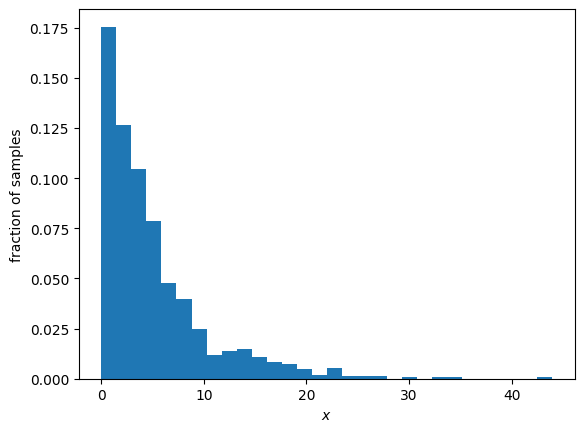

In [257]:
plt.hist(sample_exp, bins=30, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

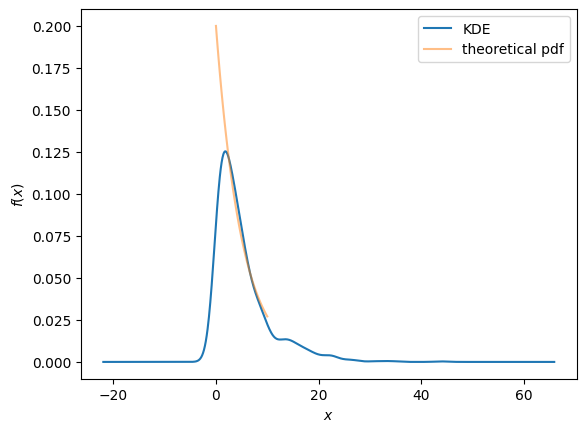

In [258]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample_exp, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,10,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Строим функцию распределения случайной величины:

Text(0.5, 0, '$x$')

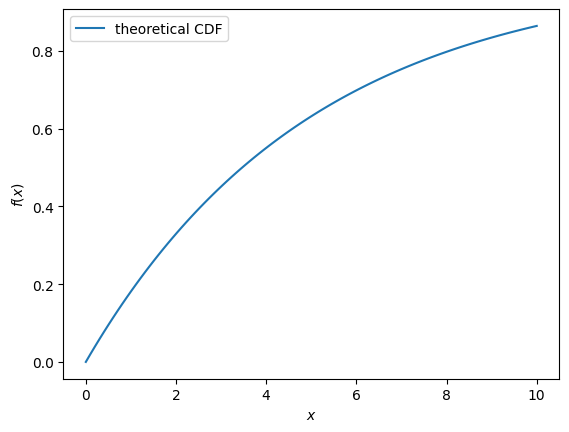

In [259]:
x = np.linspace(0,10,100)
cdf = expon_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Совмещаем гистограмму выборки и теоретическую плотность распределения случайной величины:

Text(0.5, 0, '$x$')

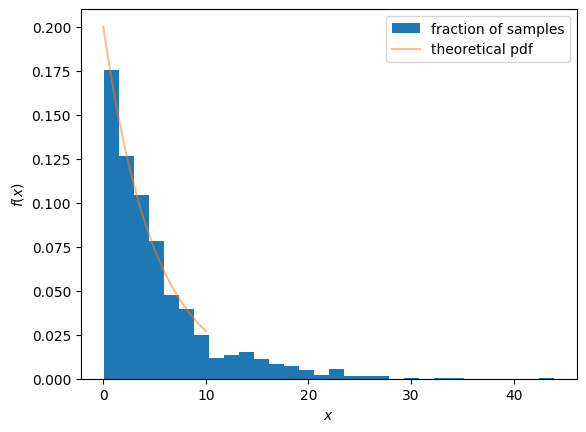

In [260]:
plt.hist(sample_exp, bins=30, density=True, label='fraction of samples')
x = np.linspace(0,10,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [261]:
sample_count = 1000
sample_length = [10, 20, 50, 100]
sample_colors = ['b', 'g', 'r', 'c']
all_samples_avg = list()
all_samples_std = list()

length_index = 0
for i in sample_length:
    all_samples_avg.append(list())
    all_samples_std.append(list())
    for j in range(0, sample_count, 1): 
        sample_data = expon_rv.rvs(i)
        sample_avg = np.mean(sample_data)
        sample_std = pow(np.std(sample_data), 2) / i
        all_samples_avg[length_index].append(sample_avg)
        all_samples_std[length_index].append(sample_std)
    length_index+=1

print(len(all_samples_avg))
print(len(all_samples_avg[0]))
print(len(all_samples_std[0]))

4
1000
1000


Смотрим выборочно на распределение средних для выборок с длинной `sample_length[0]`

Text(0.5, 0, '$x$')

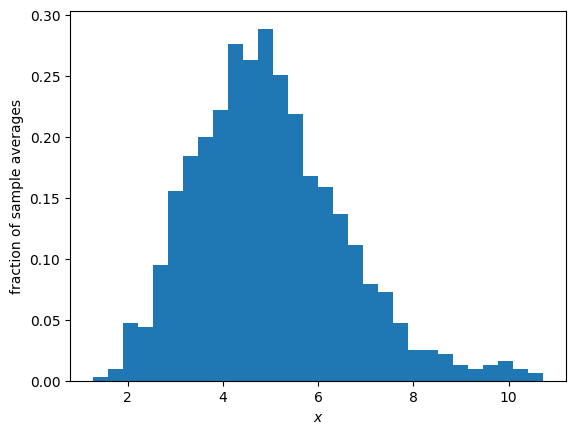

In [262]:
plt.hist(all_samples_avg[0], bins=30, density=True)
plt.ylabel('fraction of sample averages')
plt.xlabel('$x$')

Смотрим выборочно на среднеквадратическое отклонение:

Text(0.5, 0, '$x$')

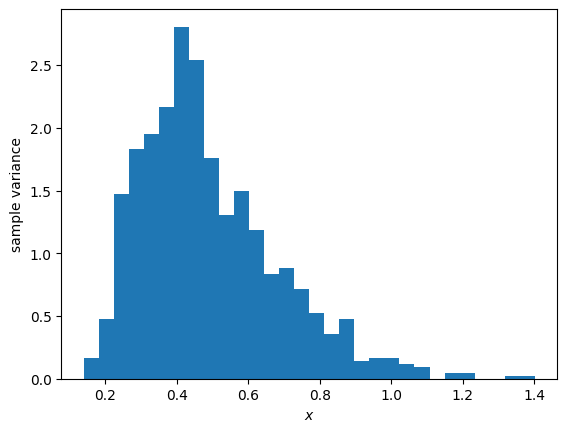

In [263]:
plt.hist(all_samples_std[2], bins=30, density=True)
plt.ylabel('sample variance')
plt.xlabel('$x$')

Строим распределение средних в выборках с разной размерностью (используем разные цевета):

Text(0.5, 0, '$x$')

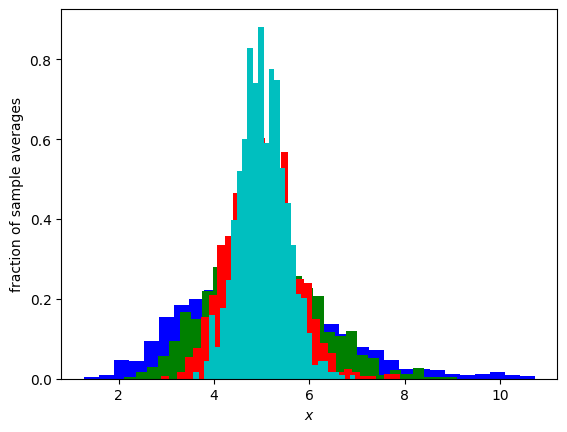

In [264]:
for i in range(0, len(sample_length), 1):
    plt.hist(all_samples_avg[i], bins=30, density=True, color=sample_colors[i])
plt.ylabel('fraction of sample averages')
plt.xlabel('$x$')

Для экспотенциального распределения справедливо:

$\mu$ = $\sigma$ = $1/\lambda$

Центральная предельная теорема утверждает:

$\overline X_{n}$ ~ N($\mu$, $\sigma^2/n$)

Считаем параметры для апроксимирующего нормального распределения:

$\mu$ = $1/\lambda$ = 1/0.2 = 5

$\sigma$ = $5/\sqrt(n)$

$\sigma^2$ = $5^2/n$

Вычисляем параметры нормальных распределений (теоретических):

In [265]:
aprox_norm_params = []
norm_mu = 1.0 / exp_lambda
for i in range(0, len(sample_length), 1):
    norm_sigma = 1.0 / (exp_lambda * math.sqrt(sample_length[i]))
    norm_varience = 1.0 / (pow(exp_lambda, 2) * sample_length[i]) 
    aprox_norm_params.append([norm_mu, norm_sigma, norm_varience])
print(aprox_norm_params) 

[[5.0, 1.5811388300841893, 2.4999999999999996], [5.0, 1.1180339887498947, 1.2499999999999998], [5.0, 0.7071067811865475, 0.4999999999999999], [5.0, 0.5, 0.24999999999999994]]


Строим совместно теоретические нормальные распределения и распределение средних по выборкам:

Text(0.5, 0, '$x$')

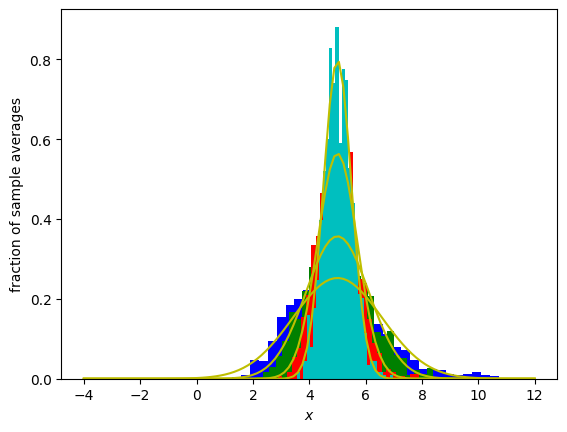

In [266]:
x = np.linspace(-4,12,100)
for i in range(0, len(sample_length), 1):
    plt.hist(all_samples_avg[i], bins=30, density=True, color=sample_colors[i])
    aprox_norm_rv = sts.norm(aprox_norm_params[i][0], aprox_norm_params[i][1])
    pdf = aprox_norm_rv.pdf(x)
    plt.plot(x, pdf, color='y')
plt.ylabel('fraction of sample averages')
plt.xlabel('$x$')

Сравнивам среднеквадратическое отклонение / среднее теорических и выборочных распределений (смотрим по выборкам n=10 и n=100):


In [267]:
#n=100, variance
print(np.mean(all_samples_std[3]))
print(aprox_norm_params[3][2])

0.24968647129494656
0.24999999999999994


In [268]:
#n=10, variance
print(np.mean(all_samples_std[0]))
print(aprox_norm_params[0][2])

2.225434155541135
2.4999999999999996


In [269]:
#n=100, mean
print(np.mean(all_samples_avg[3]))
print(aprox_norm_params[3][0])

5.022641426912147
5.0


In [270]:
#n=10, mean
print(np.mean(all_samples_avg[0]))
print(aprox_norm_params[0][0])

4.975454507685916
5.0


### Выводы
1. Хорошо видно, что пик всех полученных распределений приходится на 5 (те матожидание нормальных распределений получается равным 5). Это соответствует ожиданиям ЦПТ, так как параметр выбранного экспотенциального распределения $\lambda$=0.2, при этом $\mu$ = $1/\lambda$, таким образом получаем 0.2 = 1/5. Итого распределения средних по выборкам позволяют достаточно хорошо определить матожидание исходного распределения.
2. Для данного экспотенциального распределения $\mu$ = $\sigma$, поэтому значение можно определить по выводу из п.1. С ростом размера выборки (n) мы видим, что точность оценки параметров распределения повышается (см. выше) и они приближаются к теорическим значениям.
